# Week 06: Business Statistics & Analytics - E-commerce Analysis

## Learning Objectives
By the end of this exercise, you will be able to:
- Calculate key business metrics using pandas
- Create meaningful visualizations for business insights
- Apply statistical concepts to real business scenarios
- Make data-driven recommendations

---

## Business Context

You're working as a Data Analyst for **TechMart**, an e-commerce company. Your manager needs insights from last quarter's sales data to inform strategic decisions for the upcoming quarter.

Your analysis will help answer critical questions about customer behavior, regional performance, and product trends that directly impact business growth.

## Dataset Setup

First, let's generate the synthetic dataset you'll be analyzing:

In [51]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducible results
np.random.seed(42)

# Generate 500 orders from 2023
n_orders = 500

# Create order IDs and customer data
order_id = np.arange(1, n_orders + 1)
customer_id = np.random.randint(1, 101, size=n_orders)
customer_segment = np.random.choice(["Student", "Professional", "Senior"], size=n_orders, p=[0.4, 0.4, 0.2])
region = np.random.choice(["North", "South", "East", "West"], size=n_orders)
order_date = pd.date_range(start="2023-01-01", periods=n_orders, freq="D")
product_category = np.random.choice(["Electronics", "Clothing", "Books", "Home", "Sports"], size=n_orders)
quantity = np.random.randint(1, 5, size=n_orders)
unit_price = np.round(np.random.uniform(10, 200, size=n_orders), 2)
revenue = quantity * unit_price
discount_applied = np.random.choice([0, 5, 10, 15, 20, 25, 30], size=n_orders, p=[0.5,0.1,0.1,0.1,0.05,0.05,0.1])
payment_method = np.random.choice(["Credit Card", "PayPal", "Gift Card", "Debit Card"], size=n_orders)

# Build dataframe
df = pd.DataFrame({
    "order_id": order_id,
    "customer_id": customer_id,
    "customer_segment": customer_segment,
    "region": region,
    "order_date": order_date,
    "product_category": product_category,
    "quantity": quantity,
    "unit_price": unit_price,
    "revenue": revenue,
    "discount_applied": discount_applied,
    "payment_method": payment_method
})

# Save dataset for reference
df.to_csv("ecommerce_data.csv", index=False)
print("✅ Dataset created successfully!")

# Display first few rows
df.head()

✅ Dataset created successfully!


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


## Data Exploration

Let's start by understanding our dataset:

In [52]:
# Load the data
data = pd.read_csv("ecommerce_data.csv")

# Basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst few rows:")
data.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   customer_segment  500 non-null    object 
 3   region            500 non-null    object 
 4   order_date        500 non-null    object 
 5   product_category  500 non-null    object 
 6   quantity          500 non-null    int64  
 7   unit_price        500 non-null    float64
 8   revenue           500 non-null    float64
 9   discount_applied  500 non-null    int64  
 10  payment_method    500 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 43.1+ KB
None

Dataset Shape: (500, 11)

First few rows:


,order_id,customer_id,customer_segment,region,order_date,product_category,quantity,unit_price,revenue,discount_applied,payment_method
0,1,52,Student,North,2023-01-01,Clothing,1,42.43,42.43,0,Debit Card
1,2,93,Student,West,2023-01-02,Sports,1,24.18,24.18,0,Gift Card
2,3,15,Professional,East,2023-01-03,Sports,3,158.71,476.13,0,Debit Card
3,4,72,Student,East,2023-01-04,Sports,1,60.42,60.42,0,Credit Card
4,5,61,Student,West,2023-01-05,Books,3,43.78,131.34,0,Gift Card


Monthly Revenue:
month
2023-01    6626.66
2023-02    6796.03
2023-03    8960.10
2023-04    7713.47
2023-05    7266.80
2023-06    7982.47
2023-07    7981.65
2023-08    6664.64
2023-09    9708.06
2023-10    7287.27
2023-11    8795.85
2023-12    8119.44
2024-01    7268.59
2024-02    8388.91
2024-03    6835.73
2024-04    7430.29
2024-05    4314.71
Freq: M, Name: revenue, dtype: float64


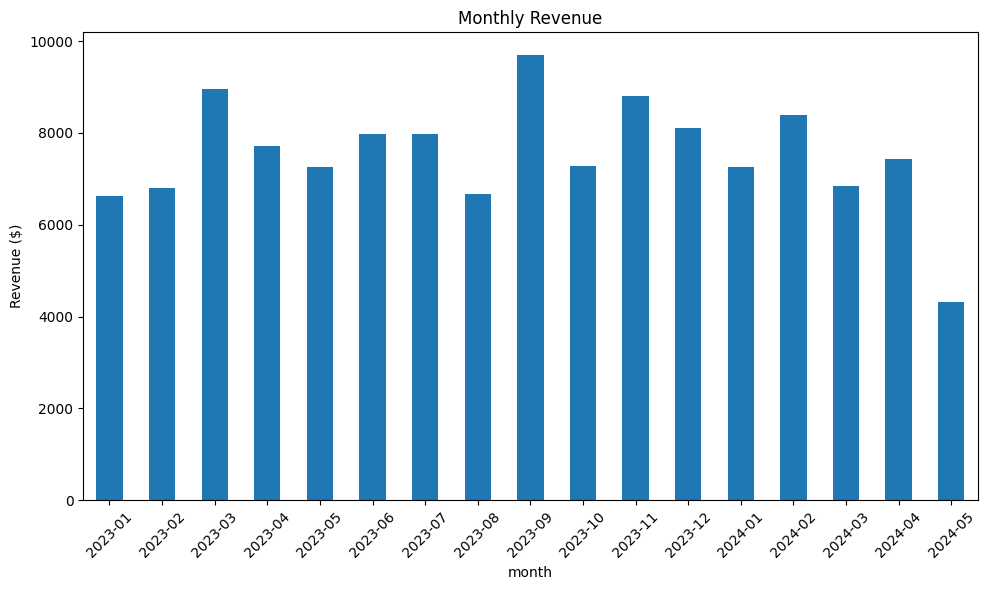

In [53]:
# Convert order_date to datetime and add helpful columns
data["order_date"] = pd.to_datetime(data["order_date"])
data["month"] = data["order_date"].dt.to_period("M")
data["day_of_week"] = data["order_date"].dt.day_name()

# Example: Revenue by month
monthly_revenue = data.groupby("month")["revenue"].sum()
print("Monthly Revenue:")
print(monthly_revenue)

# Plot monthly revenue
monthly_revenue.plot(kind="bar", figsize=(10,6), title="Monthly Revenue")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## Business Questions

Now answer each of the following business questions. Use the starter code above as a reference, and expand your analysis to solve all questions.

### 1. Revenue Overview
What was the company's total revenue last quarter? Break it down by month.

Company's Total Revenue Last Quarter: 22493.23


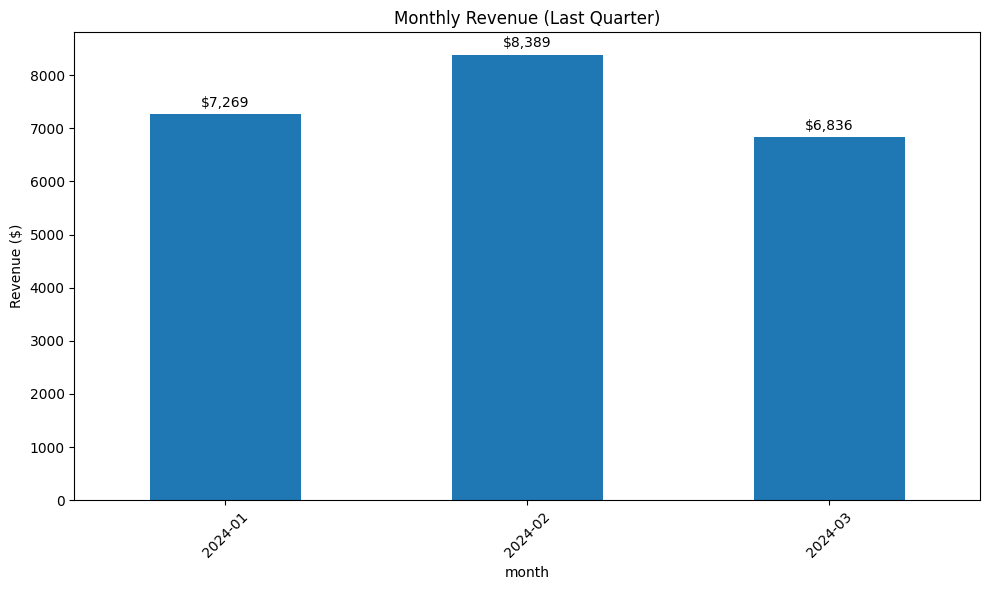

In [54]:
monthly_revenue = data.groupby("month")["revenue"].sum()
lastQuarter = monthly_revenue[12:15]
print("Company's Total Revenue Last Quarter:", lastQuarter.sum())

ax = lastQuarter.plot(
    kind="bar",
    figsize=(10,6),
    title="Monthly Revenue (Last Quarter)",
    ylabel="Revenue ($)",
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Top Customers
Who are the top 5 customers by total revenue contribution?

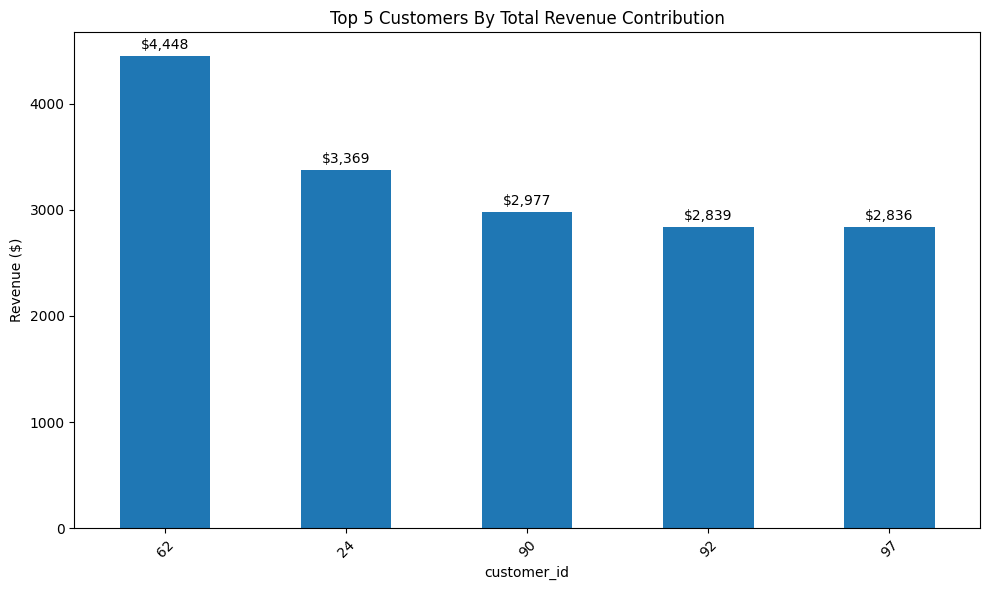

In [55]:
revenueByCustomer = data.groupby("customer_id")["revenue"].sum()
top5Customers = revenueByCustomer.sort_values(ascending = False)[0:5]

ax = top5Customers.plot(
    kind="bar",
    figsize=(10,6),
    title="Top 5 Customers By Total Revenue Contribution",
    ylabel="Revenue ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Segment Analysis
Which customer segment (Student, Professional, Senior) spends the most on average per order?

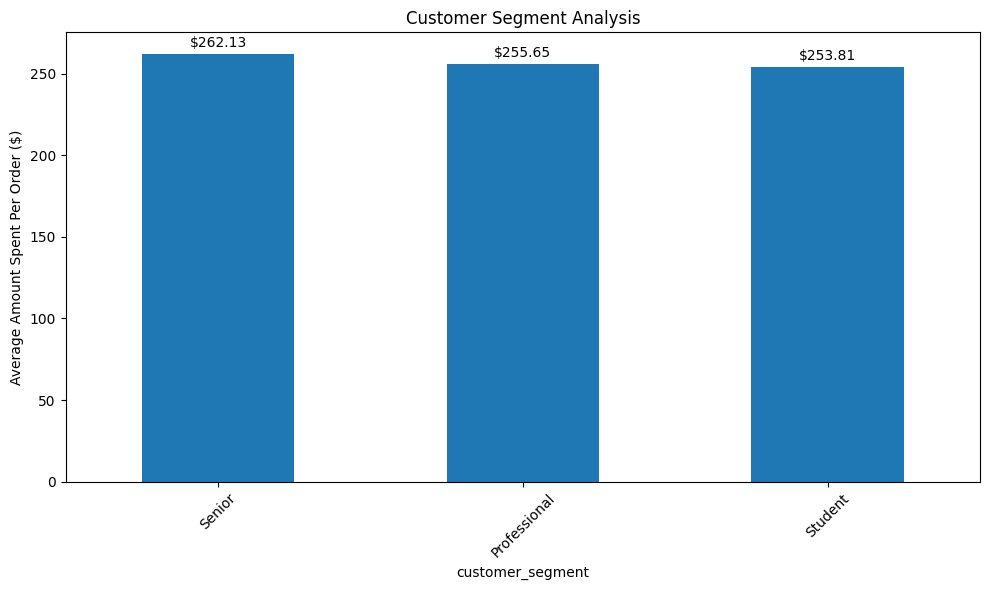

In [56]:
avgRevenueByCustomerSegment = data.groupby('customer_segment')["revenue"].mean()
ordered = avgRevenueByCustomerSegment.sort_values(ascending = False)

ax = ordered.plot(
    kind="bar",
    figsize=(10,6),
    title="Customer Segment Analysis",
    ylabel="Average Amount Spent Per Order ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.2f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Regional Trends
Which region generated the highest revenue? Which region had the highest average order size?

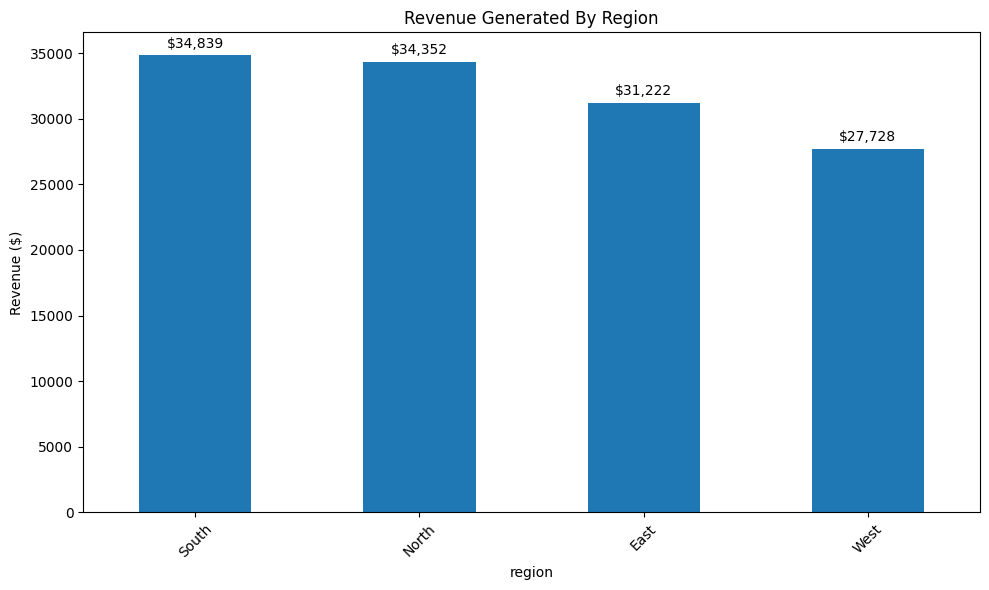

In [57]:
revenueByRegion = data.groupby('region')["revenue"].sum()
revenueByRegionSorted = revenueByRegion.sort_values(ascending = False)

ax = revenueByRegionSorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Revenue Generated By Region",
    ylabel="Revenue ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

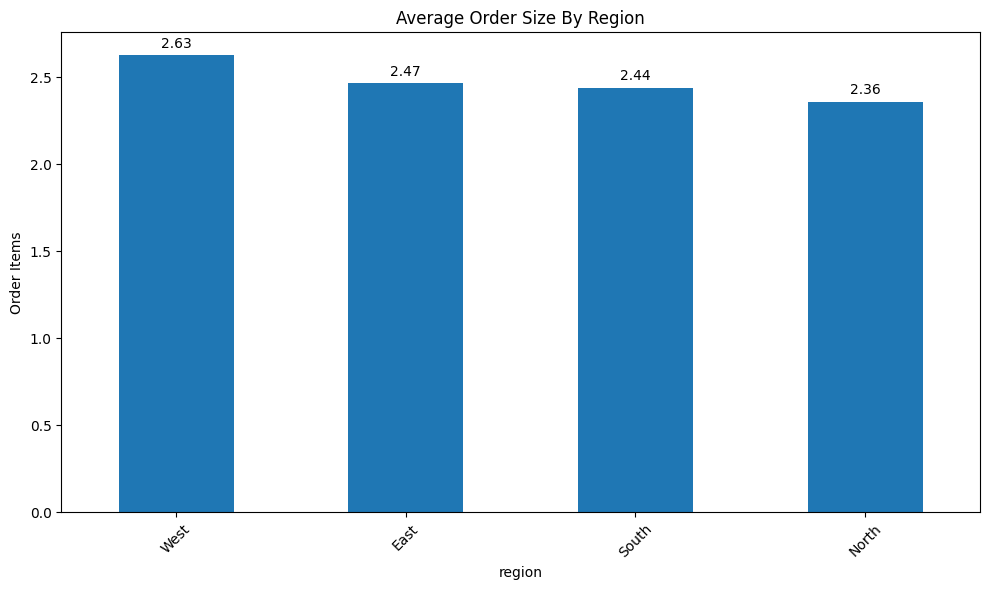

In [58]:
orderSizeByRegion = data.groupby('region')["quantity"].mean()
orderSizeByRegionSorted = orderSizeByRegion.sort_values(ascending = False)

ax = orderSizeByRegionSorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Average Order Size By Region",
    ylabel="Order Items"
)

for container in ax.containers:
    ax.bar_label(container, fmt='{:.2f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Product Category Performance
Which product category is most popular by quantity vs. by revenue?

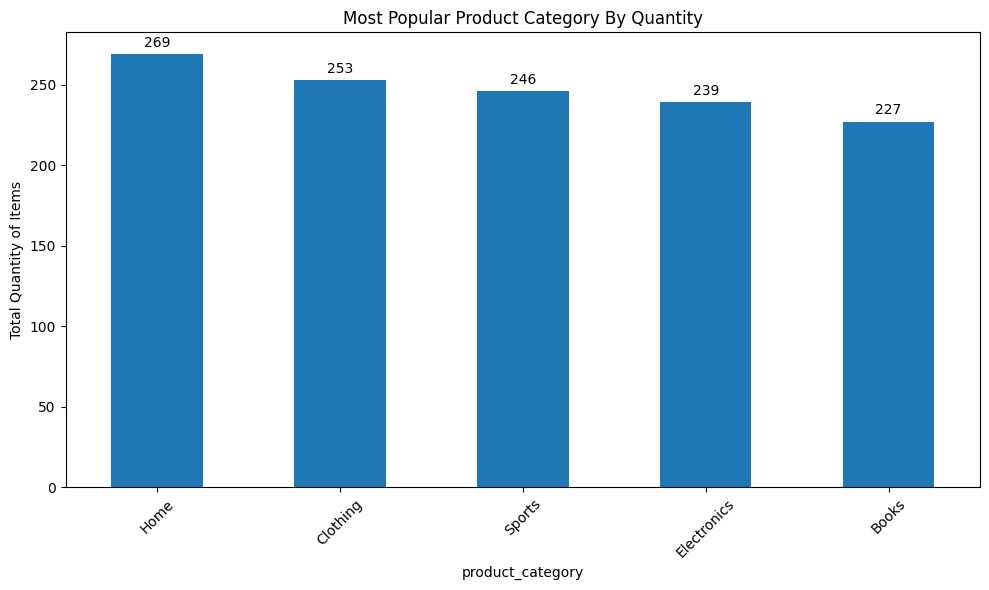

In [59]:
prodCategoryByQuantity = data.groupby('product_category')["quantity"].sum()
prodCategoryByQuantitySorted = prodCategoryByQuantity.sort_values(ascending = False)

ax = prodCategoryByQuantitySorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Most Popular Product Category By Quantity",
    ylabel="Total Quantity of Items"
)

for container in ax.containers:
    ax.bar_label(container, fmt='{:.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

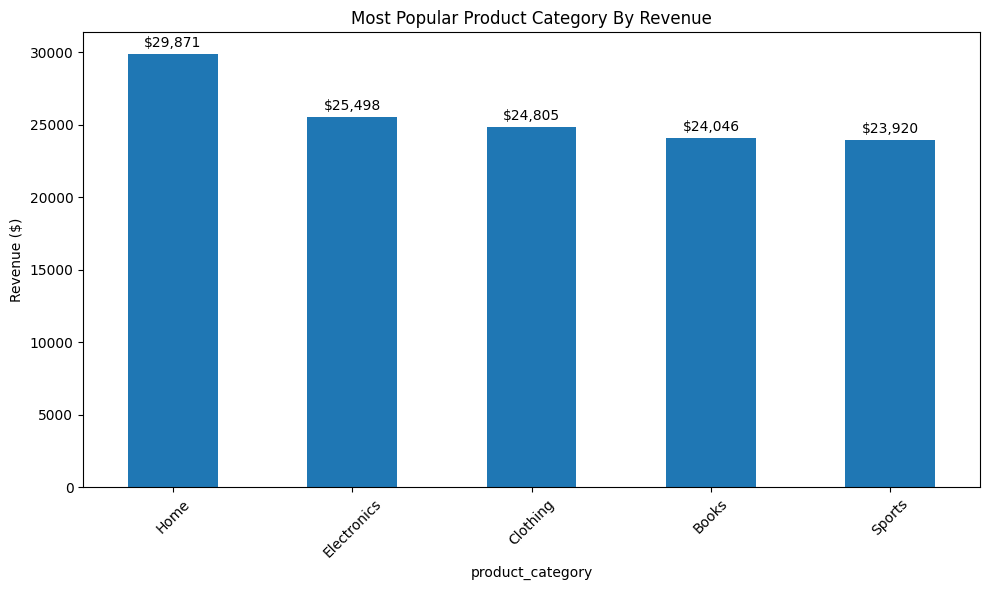

In [60]:
prodCategoryByRevenue = data.groupby('product_category')["revenue"].sum()
prodCategoryByRevenueSorted = prodCategoryByRevenue.sort_values(ascending = False)

ax = prodCategoryByRevenueSorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Most Popular Product Category By Revenue",
    ylabel="Revenue ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6. Discount Effectiveness
Do discounted orders generate higher or lower revenue per order compared to non-discounted orders?

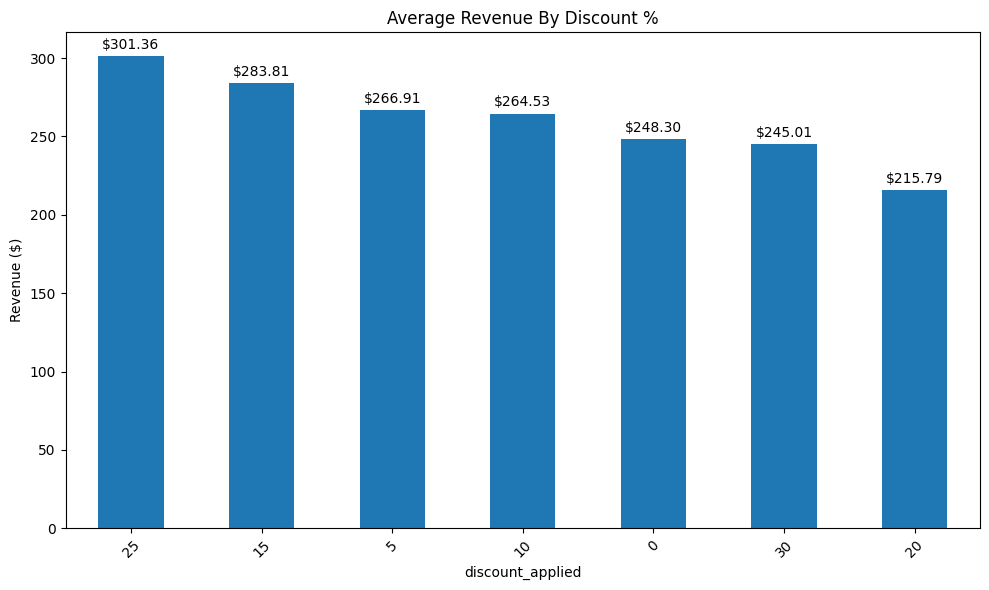

In [61]:
revenueByDiscount = data.groupby('discount_applied')["revenue"].mean()
revenueByDiscountSorted = revenueByDiscount.sort_values(ascending = False)

ax = revenueByDiscountSorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Average Revenue By Discount %",
    ylabel="Revenue ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.2f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 7. Payment Method Usage
What percentage of orders use each payment method? Does any payment method correlate with higher spending?

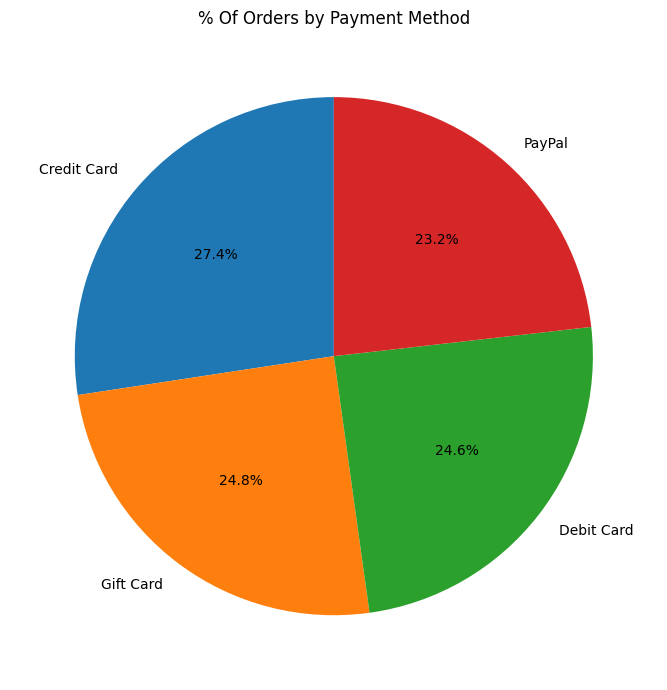

In [62]:
ordersByPaymentMethod = data.groupby('payment_method')['order_id'].count()
ordersByPaymentMethodSorted = ordersByPaymentMethod.sort_values(ascending = False)

ordersByPaymentMethodSorted.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(7, 7),
)
plt.ylabel('')
plt.title('% Of Orders by Payment Method')
plt.tight_layout()
plt.show()

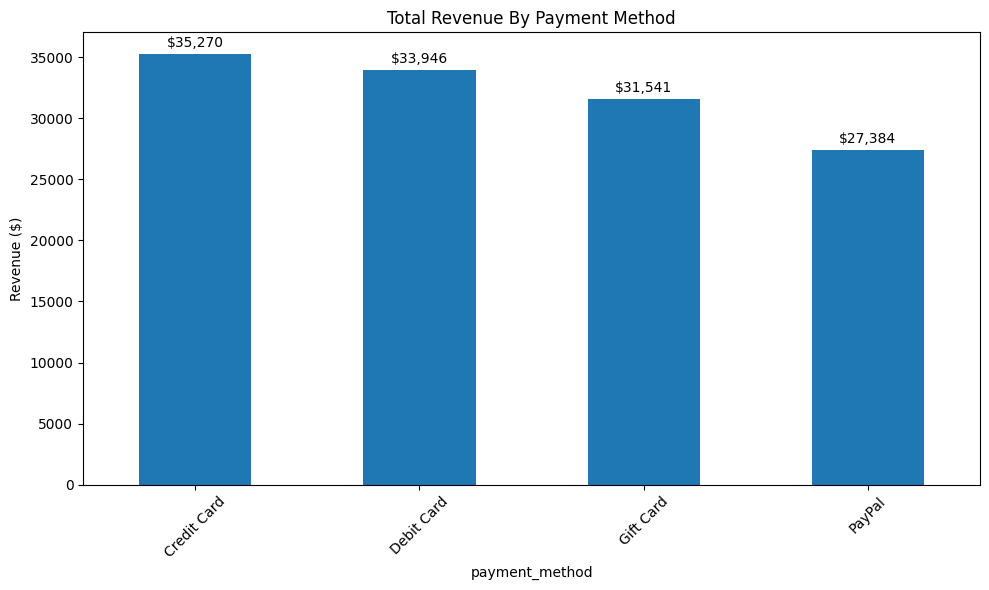

In [63]:
revenueByPaymentMethod = data.groupby('payment_method')['revenue'].sum()
revenueByPaymentMethodSorted = revenueByPaymentMethod.sort_values(ascending = False)

ax = revenueByPaymentMethodSorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Total Revenue By Payment Method",
    ylabel="Revenue ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 8. Seasonality Check
Plot revenue by day of week — are weekends busier than weekdays?

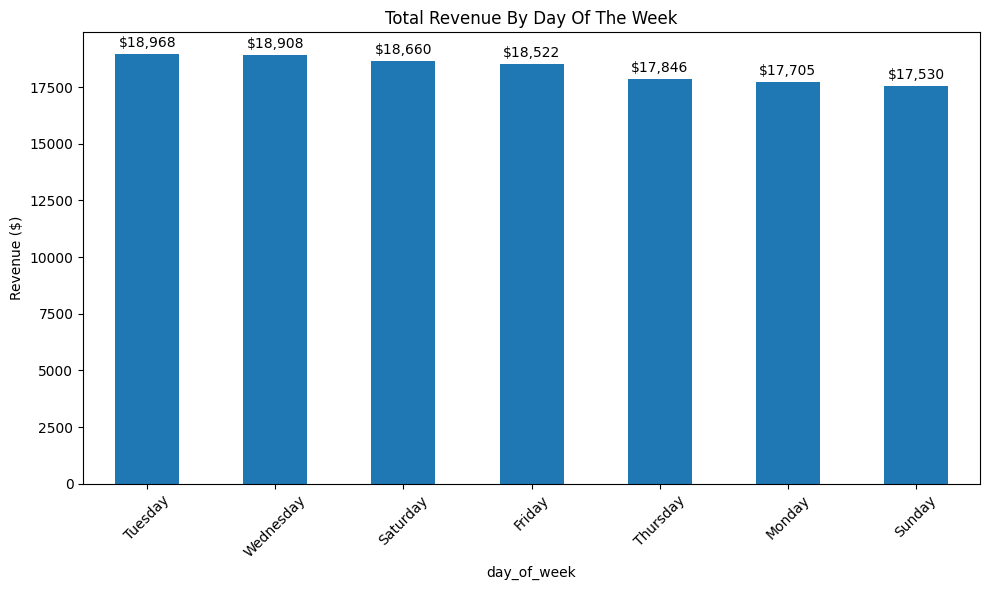

In [64]:
revenueByDay = data.groupby('day_of_week')['revenue'].sum()
revenueByDaySorted = revenueByDay.sort_values(ascending = False)

ax = revenueByDaySorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Total Revenue By Day Of The Week",
    ylabel="Revenue ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 9. Profitability (Stretch)
Assume profit margin = 20% of revenue. Estimate total profit and identify the most profitable region.

Total Profit: 25628.134


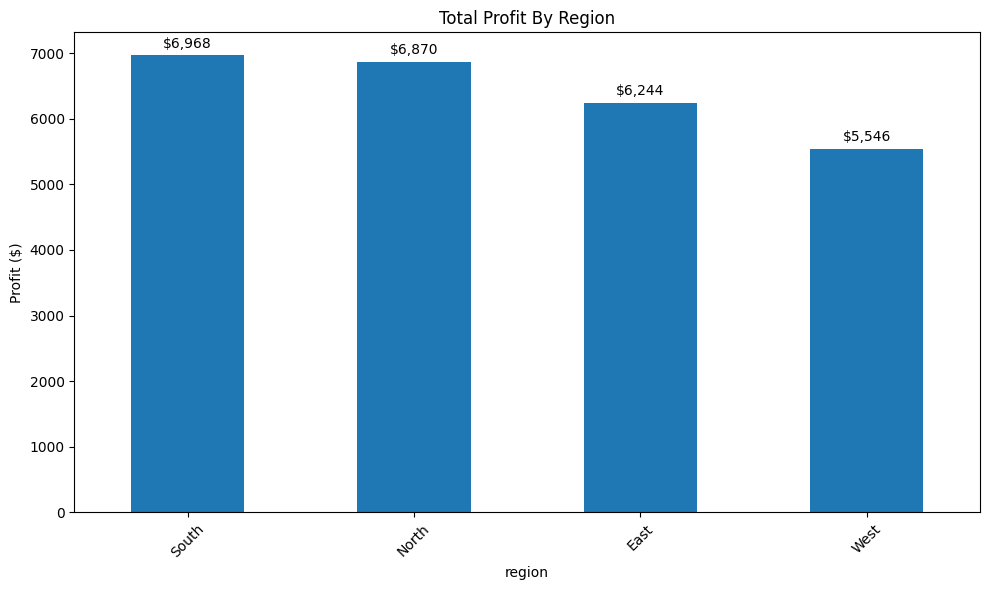

In [65]:
data['profit'] = (data['revenue'] * 0.2)

print("Total Profit:", data['profit'].sum())
profitByRegion = data.groupby('region')['profit'].sum()
profitByRegionSorted = profitByRegion.sort_values(ascending = False)

ax = profitByRegionSorted.plot(
    kind="bar",
    figsize=(10,6),
    title="Total Profit By Region",
    ylabel="Profit ($)"
)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 10. Business Recommendation
Based on your findings, recommend one strategy (e.g., focus on certain customer segments, increase discounts, promote specific regions/products).

**Your recommendation here:**

The 3 strategies I would recommend are:
- Promoting products that fall under the Home category more. This is because they are the best performining product category with the greatest quantity sold (269) and greatest revenue generated ($29,871). This means products in the Home category are in high demand and better marketing/promotion can lead to greater revenues and even bigger quantities sold.

- Focus on the Senior customer segment. This is because of the 3 segments, Seniors spend the greatest average amount per order ($262.13). They are also retired and may be more willing to spend more on products/orders, making them a customer segment with great potential for growth in the future.

- Create campaigns specific to the Southern region. This is because they are a very important region due to generating the greatest profit of any region ($6,968) and the greatest revenue of any region ($34,839). Rewarding their loyalty with a region specific discount would make them feel appreciated by the company.

---

## Submission Requirements

1. **Complete code** for all 10 questions
2. **Clear visualizations** where appropriate  
3. **Brief interpretation** of each result
4. **Final business recommendation** with supporting data

Remember: Focus on what the numbers tell us about the business, not just the calculations themselves.